### `This Notebook is for Regression Project "Houses Prices Preditction"`

### `By: Eng/ Abdelrahman Elsayed`

> [LinkedIn](https://www.linkedin.com/in/abdelrahman-elsayed--/)  <br />
> [GitHub](https://github.com/Abdelrahman51)   <br />
> [Facebook](https://www.facebook.com/abudy.sayed)   <br />

------------

### `The Target is (medina_house_value), and Evaluation Metric is (RMSE)`
`Read Carefully all my Markdowns and Comments`

-----

### `Import the main Libraries`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

#import others
import os , joblib , missingno
from sklearn.model_selection import train_test_split ,cross_val_score , cross_val_predict , RandomizedSearchCV , GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler , LabelEncoder , OneHotEncoder, PolynomialFeatures

from sklearn.pipeline import Pipeline ,FeatureUnion
from sklearn_features.transformers import DataFrameSelector

from sklearn.linear_model import LinearRegression , SGDRegressor , Ridge, Lasso , ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

### `Load the Dataset and Look at the big Picture`

In [2]:
FILE_PATH = os.path.join(os.getcwd() , 'housing.csv')
df = pd.read_csv(FILE_PATH)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

<AxesSubplot:>

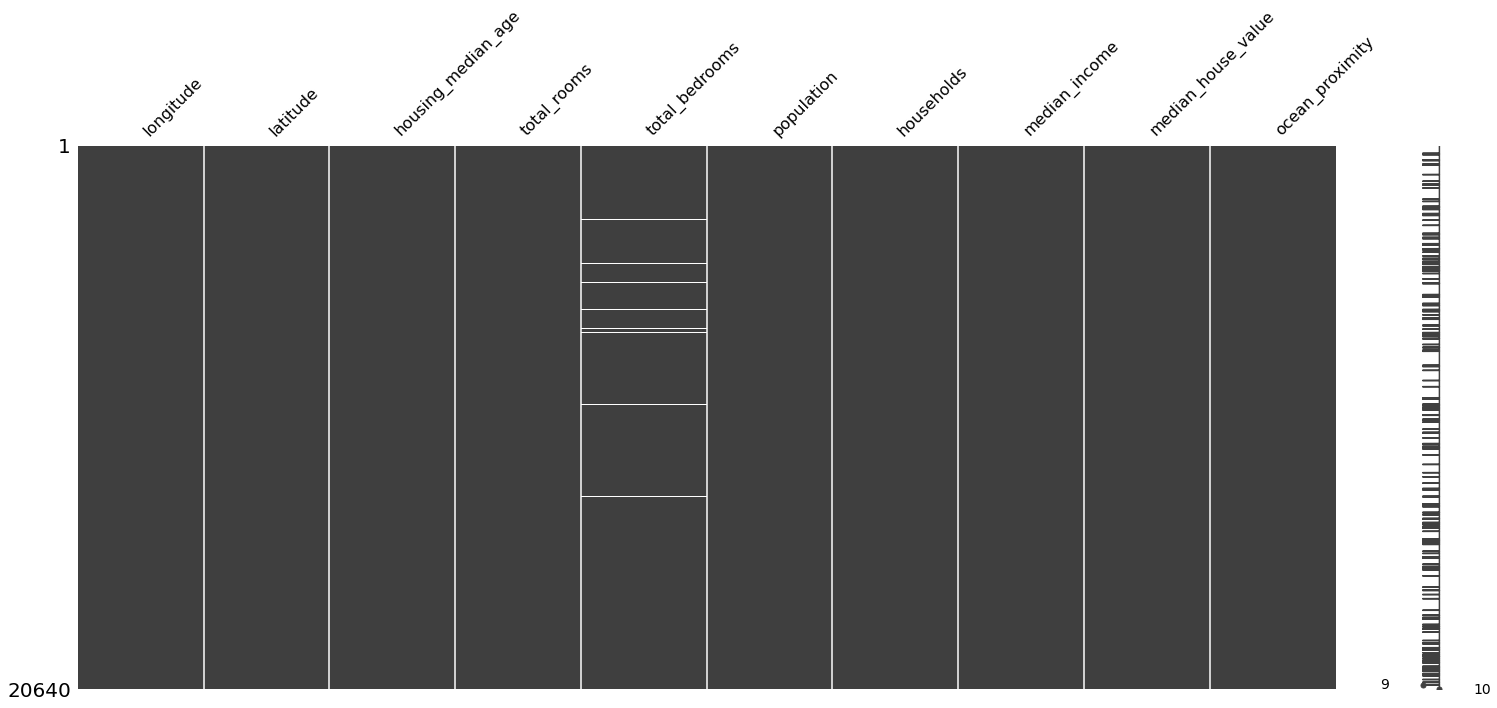

In [6]:
missingno.matrix(df)

* > `Comment: It seems that Dataset is a contains 20640 instances and only 207 null values in total_bedrooms feature, and also all datatypes is float64 as they are continuous numerical features except the (ocean_proximity) column which is nominal categorical Feature` 

----------------

### `Exploratory Data Analysis`

### `Univariate Visualization`

In [7]:
ocean_values = df['ocean_proximity'].unique()

order = df['ocean_proximity'].value_counts()
order.values[0]

9136

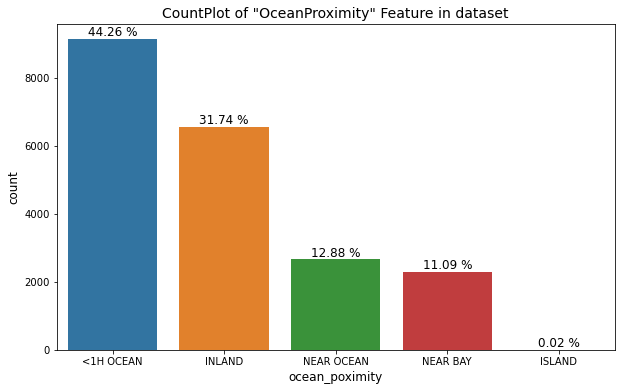

In [8]:
plt.figure(figsize=(10,6))
sns.countplot(data=df , x='ocean_proximity' ,order=order.index)
plt.title('CountPlot of "OceanProximity" Feature in dataset' , fontsize=14 ,c='k')
plt.xlabel('ocean_poximity',fontsize=12)
plt.ylabel('count', fontsize=12)


for i in range(len(order.index)):
    each_counts = order.values[i]
    each_text = f'{each_counts*100/len(df):.2f} %'
    plt.text(x=i , y = each_counts+100 , s=each_text ,ha='center' , c='k' , fontsize=12)

In [9]:
df['ocean_proximity'] = df['ocean_proximity'].replace('<1H OCEAN' , '1H OCEAN')

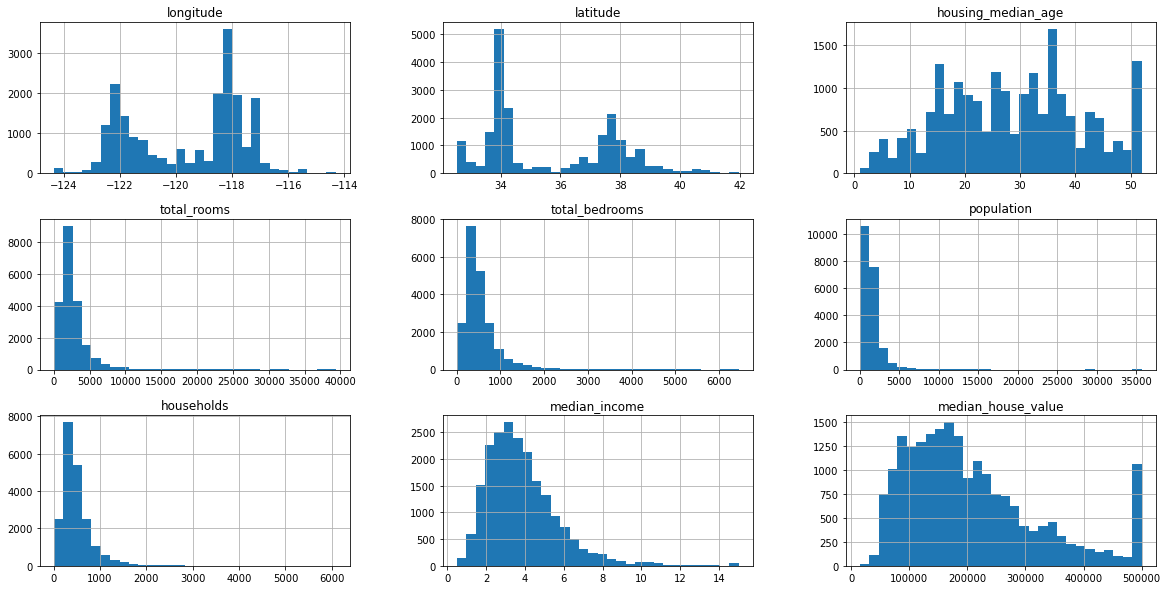

In [10]:
df.hist(bins=30 , figsize=(20,10))
plt.show()

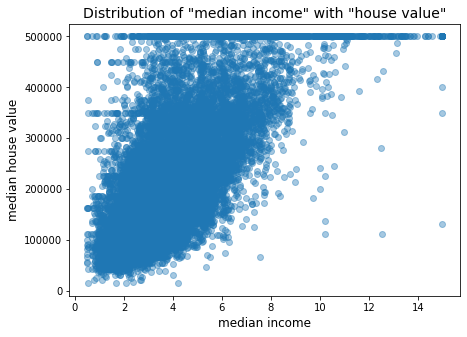

In [11]:
plt.figure(figsize=(7,5))
plt.scatter(df['median_income'] , df['median_house_value'],alpha=.4 )
plt.title('Distribution of "median income" with "house value"' , fontsize=14 ,c='k')
plt.xlabel('median income',fontsize=12)
plt.ylabel('median house value', fontsize=12)
plt.show()

In [12]:
house_value_bins = pd.cut(x=df['median_house_value'], 
                          bins=[-np.inf, 100000, 200000, 300000, 400000, 500000, np.inf],
                          labels=['0-100k', '100k-200k', '200k-300k', '300k-400k', '400k-500k', '500k<'])


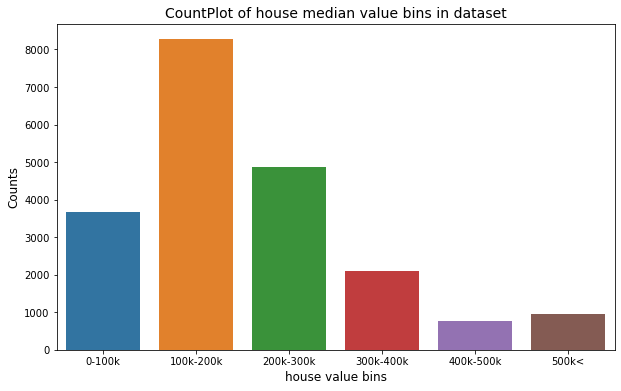

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(x=house_value_bins)
plt.title('CountPlot of house median value bins in dataset' , fontsize=14 ,c='k')
plt.xlabel('house value bins',fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.show()

In [14]:
df['median_income'].describe()

count    20640.000000
mean         3.870671
std          1.899822
min          0.499900
25%          2.563400
50%          3.534800
75%          4.743250
max         15.000100
Name: median_income, dtype: float64

In [15]:
median_income_bins = pd.cut(x=df['median_income'], 
                          bins=[-np.inf, 1.5, 3, 4.5, 6, np.inf],
                          labels=['0 - 1.5', '1.5 - 3', '3 - 4.5', '4.5 - 6', '6<'])

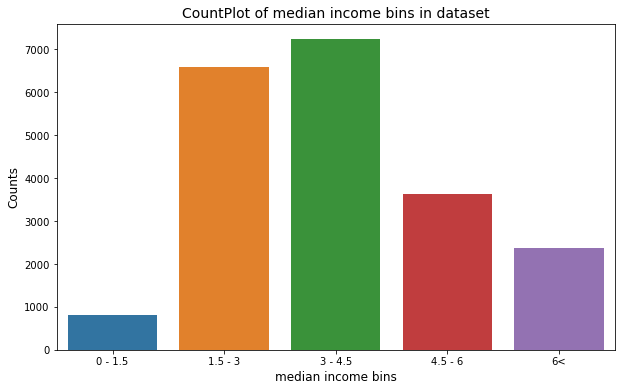

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(x=median_income_bins)
plt.title('CountPlot of median income bins in dataset' , fontsize=14 ,c='k')
plt.xlabel('median income bins',fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.show()

* > `Comment: It seems that the (<1H ocean) is about the half of the dataset the data is biased to this category, someone can think to split the data according to this column using (startified) method if we found that this column is very important, we will discuss that later, Also, it seems that the Distribution of most of features are right skewed (exponential distribution) and it is known that the best distribution to be passed to the model is Normal Distribution, we will go further with these features to know how to deal with these skewed distrbution later, Also the majority of house_value is between (100k-200k), Also the majority of median_income is between (3-4.5), someone can change his mind and split the dataset using (startified) method according to the most important feature as I think till now which is (median_income) but use (income_bins) as the stratified method requires categorical features not numerical` 

### `Bivariate Visualization`

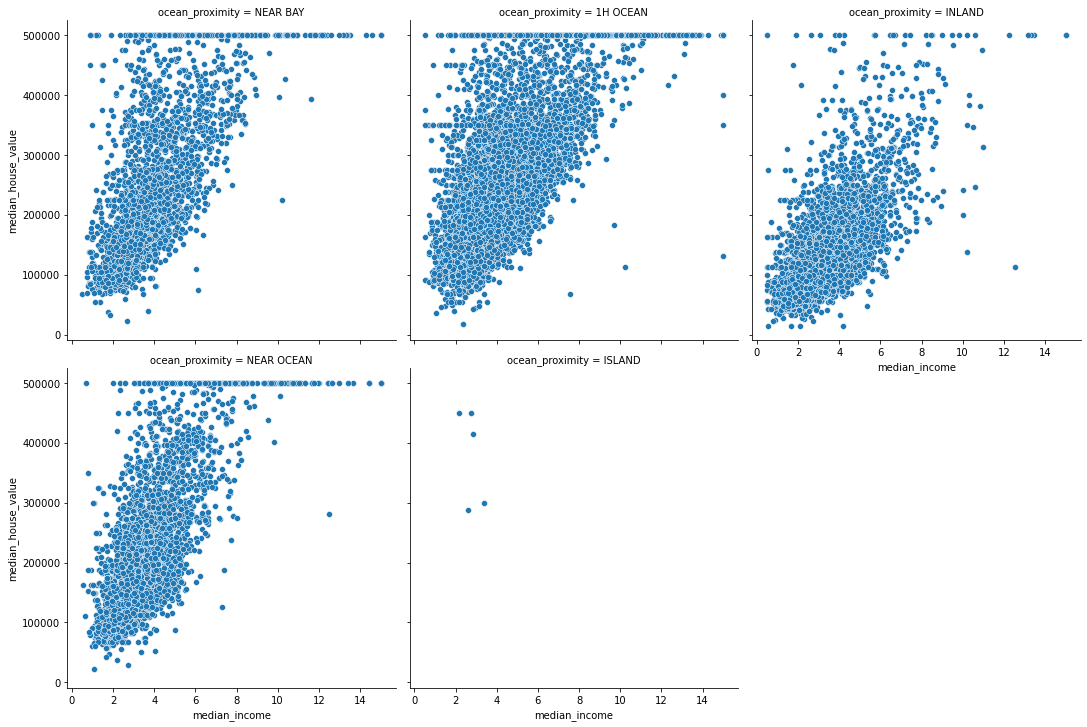

In [17]:
sns.relplot(x='median_income' , y='median_house_value' , data=df , col='ocean_proximity',col_wrap=3)
plt.show()

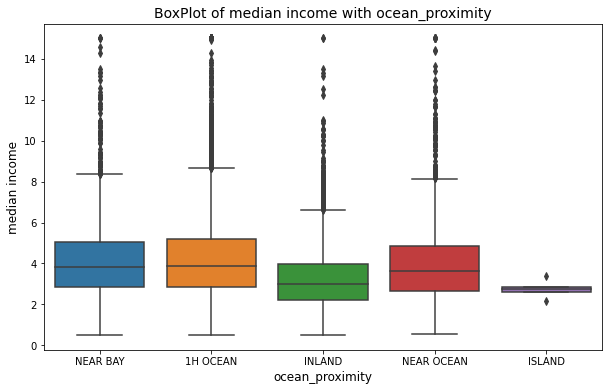

In [18]:
plt.figure(figsize=(10,6))
sns.boxplot(y='median_income' , data=df , x='ocean_proximity')
plt.title('BoxPlot of median income with ocean_proximity' , fontsize=14 ,c='k')
plt.xlabel('ocean_proximity',fontsize=12)
plt.ylabel('median income', fontsize=12)
plt.show()

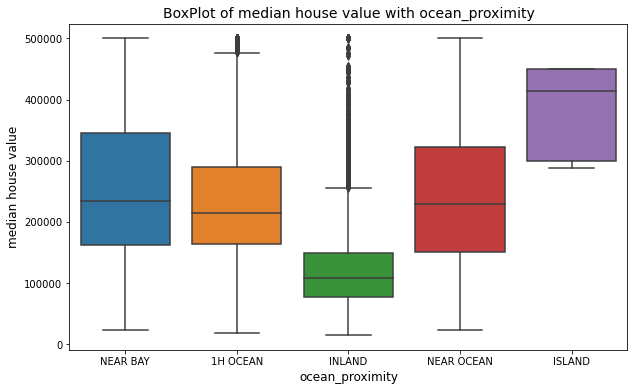

In [19]:
plt.figure(figsize=(10,6))
sns.boxplot(y='median_house_value' , data=df , x='ocean_proximity')
plt.title('BoxPlot of median house value with ocean_proximity' , fontsize=14 ,c='k')
plt.xlabel('ocean_proximity',fontsize=12)
plt.ylabel('median house value', fontsize=12)
plt.show()

* > `Comment: It seems that the Distribution of median_income is almost the same at ocean_proximity categories, Also, it seems that the INLAND median_income and median_house value is less than other categories and it makes sense ` 

### `Multivariate Visualization`

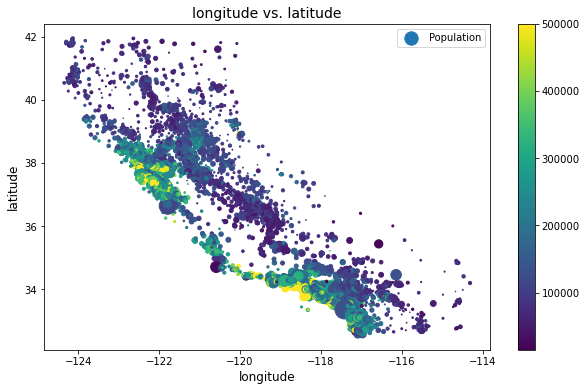

In [20]:
plt.figure(figsize=(10,6))
sc = plt.scatter(x=df['longitude'] , y=df['latitude'], s=df['population']/100 , c=df['median_house_value'], label='Population')
plt.colorbar(sc)
plt.title('longitude vs. latitude' , fontsize=14 ,c='k')
plt.ylabel('latitude',fontsize=12)
plt.xlabel('longitude', fontsize=12)
plt.legend()
plt.show()

* > `Comment: It seems that prices is higher near the ocean than other zones, and also these araes have higher population` 

---------

### `Check the Correlation between the Features and Target`

In [21]:
df.corr()['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

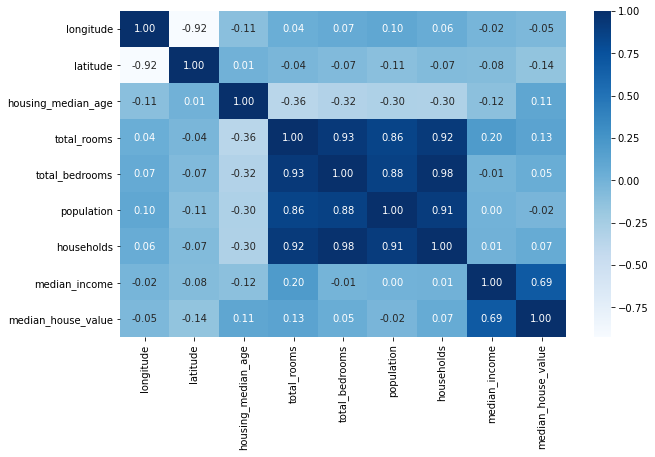

In [22]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='Blues' , fmt='.2f')
plt.show()

* > `Comment: It seems that the most correlated Feature with target is (median_income) as I predict that, and feature like (households & population) are less correlated` 

### `Feature Engineering`
``Try to add some features, thinking that it will be more useful and more correlated to the target``

In [23]:
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedroms_per_rooms'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']

In [24]:
df.corr()['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedroms_per_rooms          -0.255880
Name: median_house_value, dtype: float64

* > `Comment:Some progress for out new features (very good), Strong correlation` 

### `Split the Dataset`
``I will split the Dataset using ordinary method (random method) not (Stratified method)``

In [25]:
X = df.drop(columns='median_house_value' ,axis=1)
y = df['median_house_value']

In [26]:
X_train , X_test , Y_train , y_test = train_test_split(X , y ,shuffle=True ,test_size=0.15, random_state=42)

* `Notes in sklearn, Read Crarefully:` <br />
    * `.fit --> means that the instance you created is trying to learn or train`
    * `.transform --> means that the instance you created has learned and now time to apply what it learned by trasnforming`
    * `.fit_transform --> means the two above steps in one step, and don't use this method except with training data`
    * `We fit to train the data, and after it learns we transform (train, valid, test)`
    * `In other meaning --> (.fit) then (.transform) to training data or (fit_transform) in one step`
    * `In other meaning --> only (.transform) to other data after learing to training data`

### `Dealing with nulls`

In [48]:
num_cols = [col for col in X_train.columns if X_train[col].dtype in ['int32' , 'int64' , 'float32' , 'float64']]
categ_cols = [col for col in X_train.columns if X_train[col].dtype not in ['int32' , 'int64' , 'float32' , 'float64']]
num_cols

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'rooms_per_household',
 'bedroms_per_rooms',
 'population_per_household']

In [28]:
imputer = SimpleImputer(strategy='median')

X_train_filled = imputer.fit_transform(X_train[num_cols])
X_test_filled = imputer.transform(X_test[num_cols])

### `Standardize the Features`

In [29]:
scaler = StandardScaler()

scaler.fit(X_train_filled)

X_train_scaled = imputer.transform(X_train_filled)
X_test_filled = imputer.transform(X_test_filled)

### `Pipeline for Numerical Features  --  I will use it in this Project`
`Building a pipeline is much easier and better while inference at new dataset`

In [30]:
num_pipeline = Pipeline(steps=[
    ('imputer' , SimpleImputer(strategy='median')),
    ('scaler' , StandardScaler())
])

X_train_num = num_pipeline.fit_transform(X_train[num_cols])
X_test_num = num_pipeline.transform(X_test[num_cols])

### `Categorical Features`
`Categorical Features should be encoed before being passed to the Model, there are more than one type of encoding`
* `Label Encoding: mapping categories to numbers start from 0 to the length of categories and map these values in one column`
* `Ordinal Encoding: mapping ordinal categories start from 0 to the length of categories but orderd 0<1<2 ...`
* `OHE = One Hot Encoding: mapped to multiple columns, column for each category, each column contains ones when this category is mentioned`

<img src="https://miro.medium.com/max/1400/1*ggtP4a5YaRx6l09KQaYOnw.png" >

In [31]:
lbl_encoder = LabelEncoder()

X_train_encoded = lbl_encoder.fit_transform(np.squeeze(X_train[categ_cols].values))
X_test_encoded = lbl_encoder.transform(np.squeeze(X_test[categ_cols].values))

In [32]:
ohe = OneHotEncoder(sparse=False)
ohe.fit(X_train[categ_cols].values)

X_train_encoded = ohe.transform(X_train[categ_cols].values)
X_test_encoded = ohe.transform(X_test[categ_cols].values)

In [33]:
X_train_encoded

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

### `Pipeline for Categorical Features -- I will use it in this Project`
`Use OHE -> it is preferable to use OHE when encoding for Features, But if you are encoding the Target, you MUST encode using LabelEncoder, except in Deep Learning we can use OHE for target, but for now, you can use LabelEncoder or OrdinalEncoder or OneHotEncoder for Features and only LabelEncoder for target --- take care of this Note`

In [34]:
categ_pipline = Pipeline(steps=[
    ('imputer' , SimpleImputer(strategy='constant' , fill_value='missing')),
    ('ohe' , OneHotEncoder(sparse=False))
        ])

X_train_categ = categ_pipline.fit_transform(X_train[categ_cols])
X_test_categ =categ_pipline.transform(X_test[categ_cols])

### `Get all Together`
* `Now we have outputs from Numerical Pipeline and Cateforical Pipeline`
* `We have two solutions:`
    * `Conactenate the Features (Numerical after processing) and (Encoded Categorical)`
    * `You can use (FeatureUnion or ColumnTransformer) provided in sklearn`

In [35]:
num_pipeline = Pipeline(steps=[
                                ('selector' , DataFrameSelector(num_cols)),
                                ('imputer' , SimpleImputer(strategy='median')),
                                ('scaler' , StandardScaler())
                            ])


categ_pipline = Pipeline(steps=[
                                ('selector' , DataFrameSelector(categ_cols)),
                                ('imputer' , SimpleImputer(strategy='constant' , fill_value='missing')),
                                ('ohe' , OneHotEncoder(sparse=False))
                            ])


total_pipline = FeatureUnion(transformer_list=[
                                ('num' , num_pipeline),
                                ('categ' , categ_pipline)
                            ])

X_train_final = total_pipline.fit_transform(X_train)
X_test_final = total_pipline.transform(X_test)

In [36]:
print(X_train_final.shape)
X_test_final.shape

(17544, 16)


(3096, 16)

### `Building ML Models`

`Evaluation Metric: RMSE`

### `1. LinearRegression`

In [37]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_final , Y_train)

LinearRegression()

In [38]:
y_prdict_train = lin_reg.predict(X_train_final)

np.sqrt(mean_squared_error(Y_train , y_prdict_train))

67601.23164343799

In [39]:
mse_score_lin = cross_val_score(estimator=lin_reg , X=X_train_final, y=Y_train,
                               cv=5 , n_jobs=-1 , scoring='neg_mean_squared_error')

mse_score_lin = -1 * mse_score_lin
rmse_score_lin = np.sqrt(mse_score_lin)
rmse_score_lin.mean()

67880.14257788868

In [40]:
y_predict_lin = cross_val_predict(estimator=lin_reg , X=X_train_final, y=Y_train,
                               cv=5 , n_jobs=-1 , method='predict')

y_predict_lin

array([184295.23244419, 230100.88200316, 145096.2664977 , ...,
       195094.05173242, 278871.44475451, 272476.85764427])

In [41]:
np.sqrt(mean_squared_error(Y_train , y_predict_lin))

67898.88872785706

### `2. SGDRegressor`

In [42]:
sgd_reg = SGDRegressor(eta0=0.001)
sgd_reg.fit(X_train_final , Y_train)

SGDRegressor(eta0=0.001)

In [43]:
mse_score_sgd = cross_val_score(estimator=sgd_reg , X=X_train_final, y=Y_train,
                               cv=5 , n_jobs=-1 , scoring='neg_mean_squared_error')

mse_score_sgd = -1 * mse_score_sgd
rmse_score_sgd = np.sqrt(mse_score_sgd)
rmse_score_sgd.mean()

67994.72259049726

### `3. Ridge`
`Regression using Ordinary Least Squares, but regularized version of LinearRegression using (L2-Norm)`

In [44]:
ridge_reg = Ridge(alpha=0.9 , solver='cholesky')
ridge_reg.fit(X_train_final , Y_train)

Ridge(alpha=0.9, solver='cholesky')

In [45]:
ridge_reg.coef_

array([-56143.33756173, -56445.55099167,  13871.83771057,   6124.651729  ,
         9011.14426552, -46613.46272028,  36512.13204743,  79165.70502421,
         6345.66440518,  16579.8538867 ,    700.18763731, -18131.43835363,
       -52622.11945311, 108800.36465406, -23628.07270787, -14418.73413448])

In [46]:
mse_score_ridge = cross_val_score(estimator=ridge_reg , X=X_train_final, y=Y_train,
                               cv=5 , n_jobs=-1 , scoring='neg_mean_squared_error')

mse_score_ridge = -1 * mse_score_ridge
rmse_score_ridge = np.sqrt(mse_score_ridge)
rmse_score_ridge.mean()

67880.21922984191

### `4. Lasso`

`Regression using Ordinary Least Squares, but regularized version of LinearRegression using (L1-Norm)`

In [47]:
lasso_reg = Ridge(alpha=1)
lasso_reg.fit(X_train_final , Y_train)

Ridge(alpha=1)

In [48]:
mse_score_lasso = cross_val_score(estimator=lasso_reg , X=X_train_final, y=Y_train,
                               cv=5 , n_jobs=-1 , scoring='neg_mean_squared_error')

mse_score_lasso = -1 * mse_score_lasso
rmse_score_lasso = np.sqrt(mse_score_lasso)
rmse_score_lasso.mean()

67880.36530830245

### `5. ElasticNet`
`Regression using Ordinary Least Squares, but regularized version of LinearRegression using both (L1-Norm & L2-Norm)`

In [49]:
elastic_reg = ElasticNet(alpha=0.1 , l1_ratio=0.5)

elastic_reg.fit(X_train_final , Y_train)

ElasticNet(alpha=0.1)

In [50]:
mse_score_elastic = cross_val_score(estimator=elastic_reg , X=X_train_final, y=Y_train,
                               cv=5 , n_jobs=-1 , scoring='neg_mean_squared_error')

mse_score_elastic = -1 * mse_score_elastic
rmse_score_elastic = np.sqrt(mse_score_elastic)
rmse_score_elastic.mean()

68581.26101196748

### `6. PolynomialRegression`

In [51]:
poly_feat = PolynomialFeatures(include_bias=False)
X_ploy = poly_feat.fit_transform(X_train_final)

In [52]:
X_ploy.shape

(17544, 152)

### `8. KNN`

In [53]:
knn_reg = KNeighborsRegressor(n_neighbors=6 , p=2)
knn_reg.fit(X_train_final , Y_train)

KNeighborsRegressor(n_neighbors=6)

In [54]:
mse_score_knn = cross_val_score(estimator=knn_reg , X=X_train_final, y=Y_train,
                               cv=5 , n_jobs=-1 , scoring='neg_mean_squared_error')

mse_score_knn = -1 * mse_score_knn
rmse_score_knn = np.sqrt(mse_score_knn)
print(rmse_score_knn.mean() )


y_predict_knn = cross_val_predict(estimator=knn_reg , X=X_train_final, y=Y_train,
                               cv=5 , n_jobs=-1 , method='predict')
rmse_pred_knn = np.sqrt(mean_squared_error(Y_train , y_predict_knn))
print(rmse_pred_knn)

61282.180365177745
61287.16400494534


### `7. RandomForest`

In [38]:
forest_reg = RandomForestRegressor(max_depth=18, max_samples=0.9, n_estimators=400,
                      random_state=42)
forest_reg.fit(X_train_final ,Y_train)

RandomForestRegressor(max_depth=18, max_samples=0.9, n_estimators=400,
                      random_state=42)

In [39]:
mse_score_forest = cross_val_score(estimator=forest_reg , X=X_train_final, y=Y_train, cv=5 , n_jobs=-1 , scoring='neg_mean_squared_error')

mse_score_forest = -1 * mse_score_forest
rmse_score_forest = np.sqrt(mse_score_forest)
print(rmse_score_forest.mean() )


y_predict_forest = cross_val_predict(estimator=forest_reg , X=X_train_final, y=Y_train,
                               cv=5 , n_jobs=-1 , method='predict')
rmse_pred_forest = np.sqrt(mean_squared_error(Y_train , y_predict_forest))
print(rmse_pred_forest)

50233.050012339765
50252.975164542884


In [57]:
mse_score_forest = cross_val_score(estimator=forest_reg , X=X_train_final, y=Y_train, cv=5 , n_jobs=-1 , scoring='neg_mean_squared_error')

mse_score_forest = -1 * mse_score_forest
rmse_score_forest = np.sqrt(mse_score_forest)
print(rmse_score_forest.mean() )


y_predict_forest = cross_val_predict(estimator=forest_reg , X=X_train_final, y=Y_train,
                               cv=5 , n_jobs=-1 , method='predict')
rmse_pred_forest = np.sqrt(mean_squared_error(Y_train , y_predict_forest))
print(rmse_pred_forest)

50233.050012339765
50252.975164542884


### `RF Tuning`


In [ ]:
# parms_best_forest = {'n_estimators': np.arange(100 , 500 , 50) ,
#                     'max_depth': np.arange(4 , 20 , 2) ,
#                     'max_samples':[0.7 , 0.8 , 0.9 , 1]}

# search_random_forest = RandomizedSearchCV(estimator=forest_reg, param_distributions=parms_best_forest,
#                                           n_iter=20 , random_state=422, scoring='neg_mean_squared_error' ,cv=5 , verbose=6)

# search_random_forest.fit(X_train_final , Y_train)

In [ ]:
# search_random_forest.best_estimator_

### `Feature Importance using RF`

In [40]:
forest_reg.feature_importances_[:11]

array([0.05671857, 0.05606264, 0.04352289, 0.01234813, 0.01140784,
       0.01126648, 0.00992126, 0.4813144 , 0.02536015, 0.02377698,
       0.12235117])

In [41]:
feature_import_forest = {}
for name , score in zip(num_cols, forest_reg.feature_importances_[:11]):
    feature_import_forest[name] = score

In [42]:
keys_forest = feature_import_forest.keys()
value_forest = feature_import_forest.values()

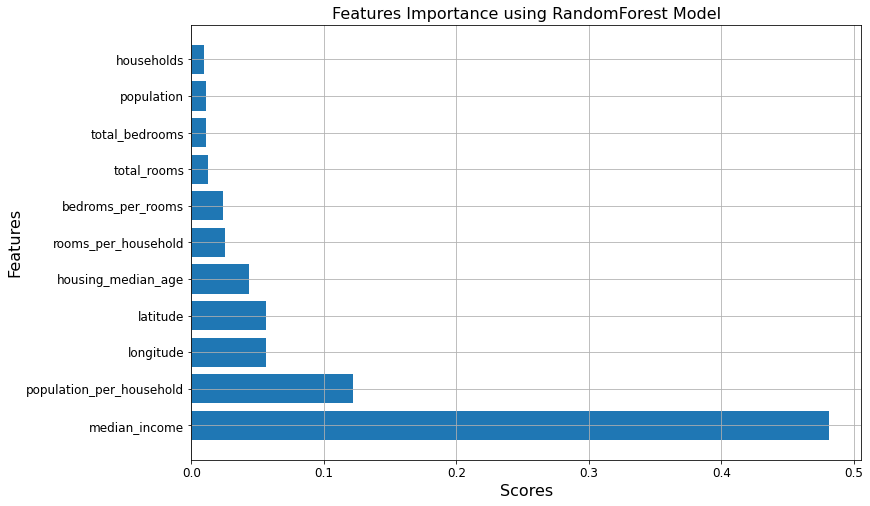

In [43]:
df_omport = pd.DataFrame({'Features': keys_forest , 'Scores': value_forest})
df_import = df_omport.sort_values(by='Scores' , ascending = False)

plt.figure(figsize=(12,8))
plt.barh(y=df_import['Features'], width=df_import['Scores'])
plt.title('Features Importance using RandomForest Model' ,fontsize=16 , c='k')
plt.xlabel('Scores' , fontsize=16 , c='k')
plt.ylabel('Features' , fontsize=16 , c='k')
plt.xticks(c='k' ,fontsize=12)
plt.yticks(c='k' ,fontsize=12)
plt.grid('on')
plt.show()

### `8. XGboost`

In [44]:
xgb_reg = XGBRegressor(learning_rate=0.1 , subsample=0.8 , n_estimator=150, max_depth=8)
xgb_reg.fit(X_train_final , Y_train)

[17:35:38] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimator=150,
             n_estimators=100, n_jobs=0, num_parallel_tree=1, predictor='auto',
             random_state=0, reg_alpha=0, ...)

In [45]:
mse_score_xgb = cross_val_score(estimator=xgb_reg , X=X_train_final, y=Y_train, cv=5 , n_jobs=-1 , scoring='neg_mean_squared_error')

mse_score_xgb = -1 * mse_score_xgb
rmse_score_xgb = np.sqrt(mse_score_xgb)
print(rmse_score_xgb.mean() )


y_predict_xgb = cross_val_predict(estimator=xgb_reg , X=X_train_final, y=Y_train,
                               cv=5 , n_jobs=-1 , method='predict')
rmse_pred_xgb = np.sqrt(mean_squared_error(Y_train , y_predict_xgb))
print(rmse_pred_xgb)

46318.687896194824
46329.262405763315


### `Tuning XGBoost`

In [ ]:
# parms_best_xgb = {'n_estimators': np.arange(100 , 200 , 50) ,
#                     'max_depth': np.arange(4 , 15 , 2) ,
#                     'subsample':[0.8 , 0.9],
#                     'learning_rate': [0.1 , 0.2]}

# search_random_xgb = GridSearchCV(estimator=xgb_reg, param_grid=parms_best_xgb,
#                                         scoring='neg_mean_squared_error' ,cv=5 , verbose=6 , n_jobs=-1)

# search_random_xgb.fit(X_train_final , Y_train)

### `Feature Importance using XGBoost`

> `Feature Importance for tuned model of xgboost`
* `Importance_types`
    * `‘weight’ - the number of times a feature is used to split the data across all trees. --> I used this Method`
    * `‘gain’ - the average gain across all splits the feature is used in.`
    * `‘cover’ - the average coverage across all splits the feature is used in.`
    * `‘total_gain’ - the total gain across all splits the feature is used in.`
    * `‘total_cover’ - the total coverage across all splits the feature is used in.`

### `VotingRegressor`

### `Models Comparison`

### `Download the best Model --- best_xgb`

In [46]:
joblib.dump(xgb_reg , 'model_XXGBoost.pkl')

['model_XXGBoost.pkl']

In [47]:
loaded_model = joblib.load('model_XXGBoost.pkl')

### `Inference on Test Dataset`

In [65]:
y_pred_test = loaded_model.predict(X_test_final)

In [66]:
np.sqrt(mean_squared_error(y_test , y_pred_test))

45306.517401143115

### `Done by Eng / Mohammed Agoor`
`@3/7/2022`